In [2]:
web = 'http://www.sports-reference.com/olympics/summer/'
req = urllib.request.Request(web)
page = urllib.request.urlopen(req)
soup = BeautifulSoup(page,'lxml')

In [3]:
table = soup.find("div", {"id": "div_Summer"})

In [4]:
URL = []
for a in table.find_all('a',href=True):
    URL.append(a['href'])

In [5]:
URL

['/olympics/summer/2016/',
 '/olympics/summer/2012/',
 '/olympics/summer/2008/',
 '/olympics/summer/2004/',
 '/olympics/summer/2000/',
 '/olympics/summer/1996/',
 '/olympics/summer/1992/',
 '/olympics/summer/1988/',
 '/olympics/summer/1984/',
 '/olympics/summer/1980/',
 '/olympics/summer/1976/',
 '/olympics/summer/1972/',
 '/olympics/summer/1968/',
 '/olympics/summer/1964/',
 '/olympics/summer/1960/',
 '/olympics/summer/1956/',
 '/olympics/summer/1952/',
 '/olympics/summer/1948/',
 '/olympics/summer/1936/',
 '/olympics/summer/1932/',
 '/olympics/summer/1928/',
 '/olympics/summer/1924/',
 '/olympics/summer/1920/',
 '/olympics/summer/1912/',
 '/olympics/summer/1908/',
 '/olympics/summer/1906/',
 '/olympics/summer/1904/',
 '/olympics/summer/1900/',
 '/olympics/summer/1896/']

In [6]:
URLfull = []
for i in URL:
    URLfull.append('https://www.sports-reference.com' + i)

In [7]:
URLfull

['https://www.sports-reference.com/olympics/summer/2016/',
 'https://www.sports-reference.com/olympics/summer/2012/',
 'https://www.sports-reference.com/olympics/summer/2008/',
 'https://www.sports-reference.com/olympics/summer/2004/',
 'https://www.sports-reference.com/olympics/summer/2000/',
 'https://www.sports-reference.com/olympics/summer/1996/',
 'https://www.sports-reference.com/olympics/summer/1992/',
 'https://www.sports-reference.com/olympics/summer/1988/',
 'https://www.sports-reference.com/olympics/summer/1984/',
 'https://www.sports-reference.com/olympics/summer/1980/',
 'https://www.sports-reference.com/olympics/summer/1976/',
 'https://www.sports-reference.com/olympics/summer/1972/',
 'https://www.sports-reference.com/olympics/summer/1968/',
 'https://www.sports-reference.com/olympics/summer/1964/',
 'https://www.sports-reference.com/olympics/summer/1960/',
 'https://www.sports-reference.com/olympics/summer/1956/',
 'https://www.sports-reference.com/olympics/summer/1952/

In [8]:
years =list(range(1896,2020,4))[::-1]

In [9]:
for i in range(len(URLfull)):
    req = urllib.request.Request(URLfull[i])
    page = urllib.request.urlopen(req)
    soup = BeautifulSoup(page,'lxml')
    table = soup.find('div', {'id': 'div_countries'})
    cells = []
    for row in table.findAll("tr"):
        result = row.findAll("td")
        if len(result) == 6:
            dic = {}
            dic['Rank'] = result[0].get_text()
            dic['Country'] = result[1].get_text()
            dic['Gold'] = result[2].get_text()
            dic['Sliver'] = result[3].get_text()
            dic['Bronze'] = result[4].get_text()
            dic['Total'] = result[5].get_text()
            cells.append(dic)
    data = pd.DataFrame(cells)
    data['year'] = np.repeat(years[i], data.shape[0])
    data.to_csv(r'history.txt', header = None, index = None, sep = ',',
               mode = 'a')

In [10]:
history=pd.read_csv('history.txt', header = None)

In [11]:
history.head()

,0,1,2,3,4,5,6
0,1,United States,46,37,38,121,2016
1,2,China,26,18,26,70,2016
2,3,Great Britain,27,23,17,67,2016
3,4,Russia,19,17,20,56,2016
4,5,Germany,17,10,15,42,2016


In [16]:
data.head(13)

,Rank,Country,Gold,Silver,Bronze,Total,Year
0,1,United States,46,37,38,121,2016
1,2,China,26,18,26,70,2016
2,3,Great Britain,27,23,17,67,2016
3,4,Russia,19,17,20,56,2016
4,5,Germany,17,10,15,42,2016
5,6,France,10,18,14,42,2016
6,7,Japan,12,8,21,41,2016
7,8,Australia,8,11,10,29,2016
8,9,Italy,8,12,8,28,2016
10,11,South Korea,9,3,9,21,2016


In [12]:
history.columns=['Rank','Country','Gold','Silver','Bronze','Total','Year']

In [13]:
history.head()

,Rank,Country,Gold,Silver,Bronze,Total,Year
0,1,United States,46,37,38,121,2016
1,2,China,26,18,26,70,2016
2,3,Great Britain,27,23,17,67,2016
3,4,Russia,19,17,20,56,2016
4,5,Germany,17,10,15,42,2016


In [14]:
top_countries = ['United States','China','Great Britain','Russia',
                'Australia','Brazil','France','Germany','Hungary','Italy',
                'Japan','South Korea','Sweden']

In [15]:
data=history[history['Country'].isin(top_countries)]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


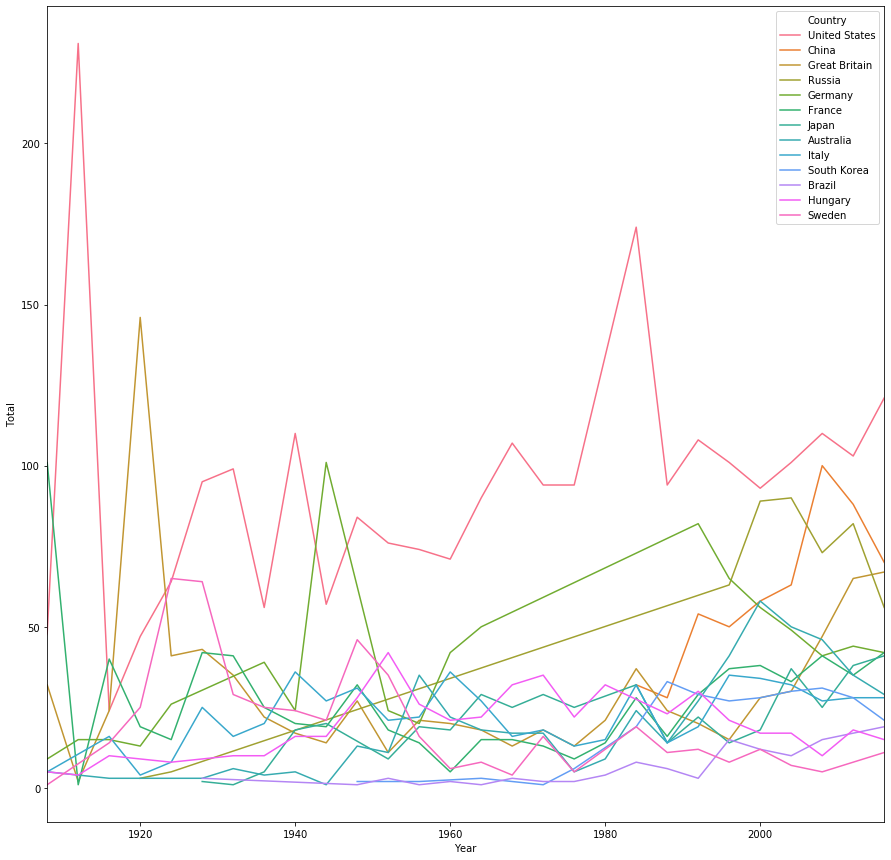

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
f,ax = plt.subplots(figsize = (15,15))
sns.tsplot(data, time = 'Year', unit = 'Country', condition = 'Country', value = 'Total', ax = ax)
plt.show()

In [19]:
# For the medal ranking at 2012, to see what factors affect the total medals earned by each country
import pandas as pd 
import numpy as np 
data = pd.read_csv('relationshipdata.csv')

In [20]:
data

,Unnamed: 0,Country,Total,Population,GDP,GDPgrowth,Life
0,1,Afghanistan,1,26528.741,384.131681,3.611368,43.77
1,2,Algeria,2,34811.059,4912.251941,2.400000,73.52
2,3,Argentina,6,40381.860,9999.093517,3.074946,76.32
3,4,Armenia,6,2975.029,3919.975474,6.900000,72.12
4,5,Australia,46,21370.348,49628.115127,3.706700,80.62
...,...,...,...,...,...,...,...
82,83,United States,110,304473.143,48401.427340,-0.291621,78.00
83,84,Uzbekistan,6,26952.719,1023.119641,9.000000,64.98
84,85,Venezuela,1,28116.716,11224.646703,5.277854,73.28
85,86,Vietnam,1,23040.000,1164.612525,5.661771,71.07


In [21]:
df = data[['Total','Population','GDP','GDPgrowth','Life']]

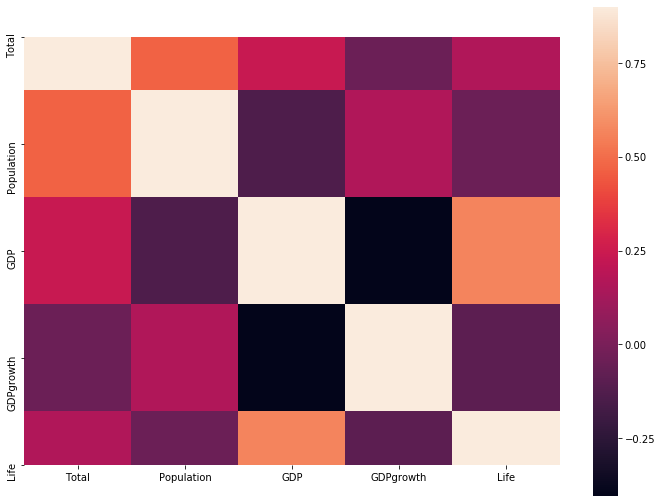

In [22]:
# Correlation matrix
corrmat = df.corr()
plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,vmax = 0.9, square = True)
plt.show()

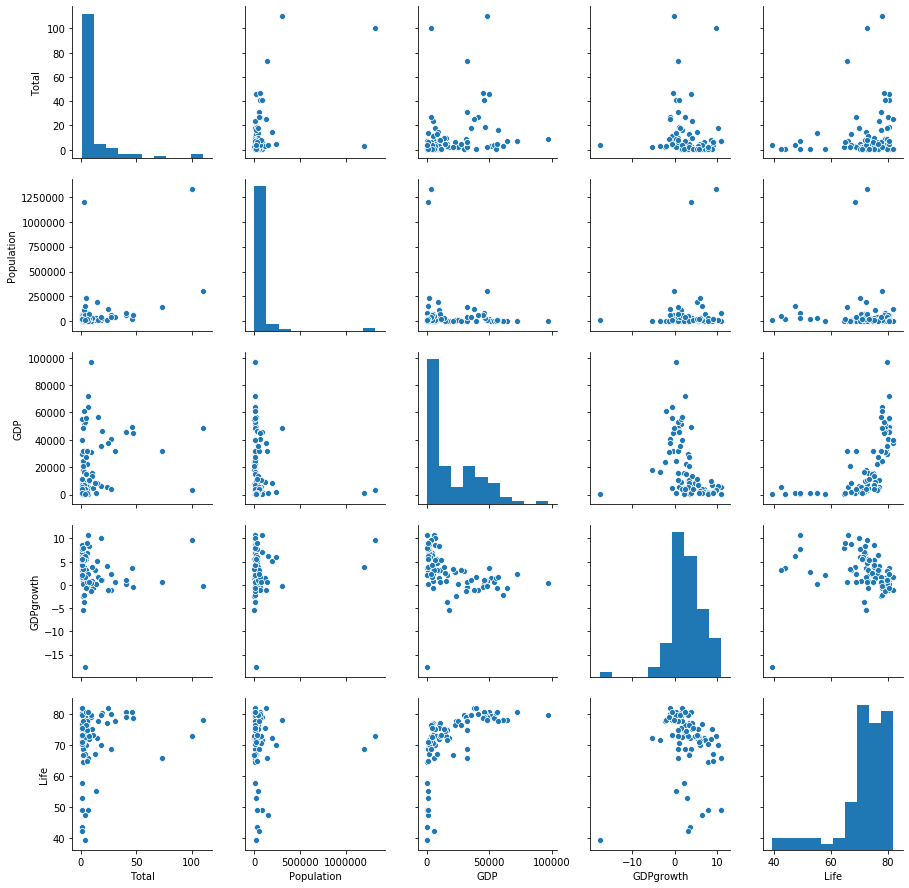

In [23]:
# distribution
sns.pairplot(df)
plt.show()

In [24]:
# rescale the data: mean0, std:1
#处理数据，把数据数量级处理成同等级
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

In [25]:
scaled_df

array([[-5.27829117e-01, -1.93233867e-01, -9.57997231e-01,
         2.20394034e-01, -3.08796868e+00],
       [-4.75227590e-01, -1.49900110e-01, -7.40542372e-01,
        -8.53693341e-02,  1.65670677e-01],
       [-2.64821481e-01, -1.20753230e-01, -4.96255923e-01,
         8.49947034e-02,  4.71895558e-01],
       [-2.64821481e-01, -3.16468789e-01, -7.88194671e-01,
         1.05048262e+00,  1.25582371e-02],
       [ 1.83923960e+00, -2.20222995e-01,  1.40685681e+00,
         2.44456708e-01,  9.42169481e-01],
       [-4.22626063e-01, -2.88443483e-01,  1.49129416e+00,
        -3.00609786e-01,  7.87963380e-01],
       [-2.12219954e-01, -2.85632559e-01, -7.08734111e-01,
         2.02792633e+00, -6.61136500e-01],
       [-4.75227590e-01, -3.30210545e-01,  1.59658097e-01,
        -1.27774564e+00,  6.29382639e-01],
       [ 3.66396844e-01, -2.82191210e-01, -6.70240182e-01,
         1.88344072e+00, -2.13829442e-01],
       [-4.75227590e-01, -2.75636972e-01,  1.34905963e+00,
        -5.02579569e-01

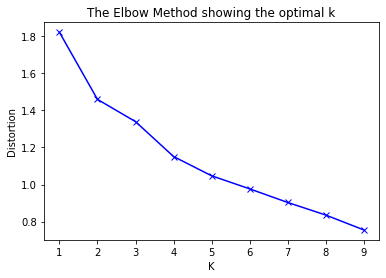

In [26]:
# Determine optimal k
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# K means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaled_df)
    kmeanModel.fit(scaled_df)
    distortions.append(sum(np.min(cdist(scaled_df,kmeanModel.cluster_centers_,'euclidean'),
                          axis = 1))/scaled_df.shape[0])
    
#Plot the elbow graph
plt.plot(K,distortions,'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [27]:
L1=distortions[0:len(distortions)-1]
L2=distortions[1:len(distortions)]
ret = list(map(lambda x,y: (x-y)/x, L1,L2))
ret #每一次降低幅度d

[0.1988163085542606,
 0.082230311894318,
 0.140598196889094,
 0.09019777573828208,
 0.06734985529086754,
 0.07515379361014728,
 0.0751367941594382,
 0.09607754944720794]

In [28]:
# When K increases, the centroids are closer to the clusters centroids.
# The improvements will decline, at some point rapidly, creating the elbow shape.
# That point is the optimal value for K. In the image above, K = 3.

In [29]:
kmeans = KMeans()
kmeans.set_params(n_clusters = 3)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
label = kmeans.labels_
label

array([0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [31]:
data['Cluster'] = label

In [32]:
data[data['Cluster'] == 0]['Country'] #developing countries (including some developed countries)

0             Afghanistan
1                 Algeria
2               Argentina
3                 Armenia
6              Azerbaijan
8                 Belarus
10                 Brazil
11               Bulgaria
12               Cameroon
14                  Chile
17               Colombia
18               Colombia
19                Croatia
20                   Cuba
21         Czech Republic
23     Dominican Republic
24                Ecuador
25                  Egypt
27               Ethiopia
30                Georgia
34                Hungary
37              Indonesia
38                   Iran
42                Jamaica
44             Kazakhstan
45                  Kenya
48              Lithuania
49               Malaysia
50              Mauritius
51                 Mexico
52                Moldova
53               Mongolia
54                Morocco
57                Nigeria
60                 Panama
61                 Poland
63                Romania
65                 Serbia
69          

In [33]:
data[data['Cluster'] == 1]['Country'] # exception for india and china

15    China
36    India
Name: Country, dtype: object

In [34]:
data[data['Cluster'] == 2]['Country'] #developed countries

4          Australia
5            Austria
7            Bahamas
9            Belgium
13            Canada
16    Chinese Taipei
22           Denmark
26           Estonia
28           Finland
29            France
31           Germany
32     Great Britain
33            Greece
35           Iceland
39           Ireland
40            Israel
41             Italy
43             Japan
46        Kyrgyzstan
47            Latvia
55       Netherlands
56       New Zealand
58       North Korea
59            Norway
62          Portugal
64            Russia
66         Singapore
67          Slovakia
68          Slovenia
70       South Korea
71             Spain
73            Sweden
74       Switzerland
82     United States
Name: Country, dtype: object

In [35]:
center = kmeans.cluster_centers_
center

array([[-0.29679496, -0.14381064, -0.67557168,  0.37531721, -0.42606387],
       [ 2.128548  ,  6.27022558, -0.86926149,  1.01442999, -0.13891371],
       [ 0.31998373, -0.15312083,  1.06449055, -0.62264816,  0.6472672 ]])

In [36]:
scaled_plot = pd.DataFrame(scaled_df, columns=['Total','Population',
                                               'GDP','GDPgrowth','Life'])

In [37]:
scaled_plot.head()

,Total,Population,GDP,GDPgrowth,Life
0,-0.527829,-0.193234,-0.957997,0.220394,-3.087969
1,-0.475228,-0.149900,-0.740542,-0.085369,0.165671
2,-0.264821,-0.120753,-0.496256,0.084995,0.471896
3,-0.264821,-0.316469,-0.788195,1.050483,0.012558
4,1.839240,-0.220223,1.406857,0.244457,0.942169


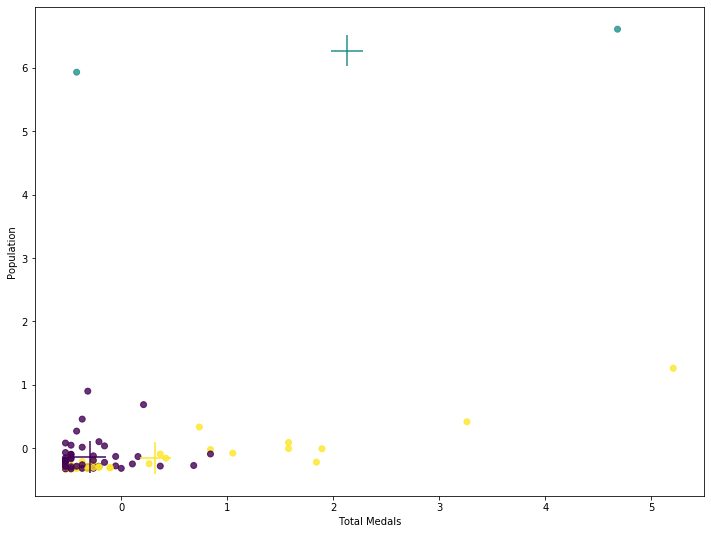

In [38]:
# 每两个维度去看
# visualize the result
plt.subplots(figsize = (12,9))
plt.scatter(scaled_plot['Total'], scaled_plot['Population'], c = label, alpha = 0.8)
plt.scatter(center[:,0],center[:,1],c=[0,1,2],marker='+',s=1000)
plt.xlabel('Total Medals')
plt.ylabel('Population')
plt.show()
# 中国和印度单列出来

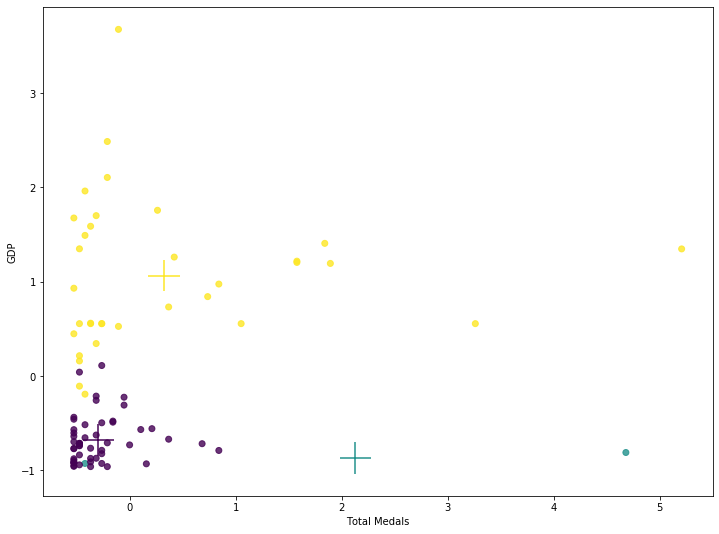

In [39]:
plt.subplots(figsize = (12,9))
plt.scatter(scaled_plot['Total'], scaled_plot['GDP'], c = label, alpha = 0.8)
plt.scatter(center[:,0],center[:,2],c=[0,1,2],marker='+',s=1000)
plt.xlabel('Total Medals')
plt.ylabel('GDP')
plt.show() #区分发展中和发达国家

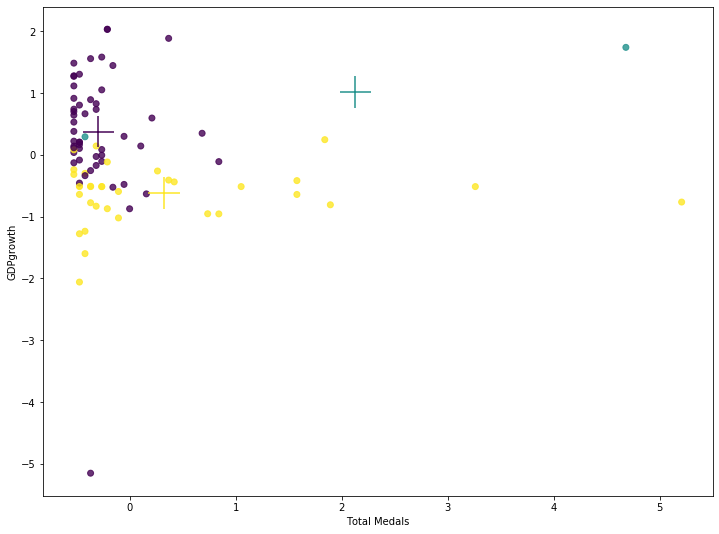

In [40]:
plt.subplots(figsize = (12,9))
plt.scatter(scaled_plot['Total'], scaled_plot['GDPgrowth'], c = label, alpha = 0.8)
plt.scatter(center[:,0],center[:,3],c=[0,1,2],marker='+',s=1000)
plt.xlabel('Total Medals')
plt.ylabel('GDPgrowth')
plt.show()
#发展中+发达国家 和 中国印度区分 --> 尝试k=4， 细分data[data['Cluster'] == 1]['Country'] 发展中国家（夹杂发达国家）

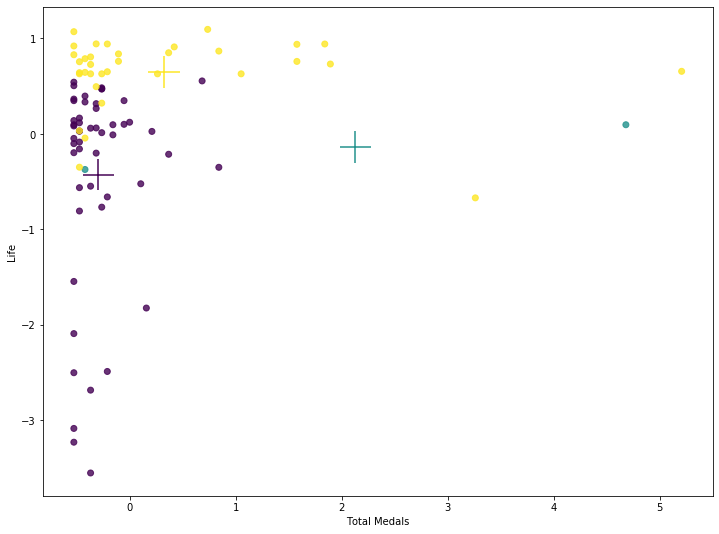

In [41]:
plt.subplots(figsize = (12,9))
plt.scatter(scaled_plot['Total'], scaled_plot['Life'], c = label, alpha = 0.8)
plt.scatter(center[:,0],center[:,4],c=[0,1,2],marker='+',s=1000)
plt.xlabel('Total Medals')
plt.ylabel('Life')
plt.show()

In [42]:
# That point is the optimal value for K. In the image above, K = 4.
kmeans = KMeans()
kmeans.set_params(n_clusters = 4)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
label = kmeans.labels_
label

array([3, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 3, 1, 0, 2, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 3, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1,
       0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 3, 1, 1, 3, 1, 1, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 3],
      dtype=int32)

In [44]:
data['Cluster'] = label

In [45]:
data[data['Cluster'] == 0]['Country'] # developing countries

1                 Algeria
2               Argentina
3                 Armenia
6              Azerbaijan
8                 Belarus
10                 Brazil
11               Bulgaria
14                  Chile
17               Colombia
18               Colombia
19                Croatia
20                   Cuba
21         Czech Republic
23     Dominican Republic
24                Ecuador
25                  Egypt
30                Georgia
34                Hungary
37              Indonesia
38                   Iran
42                Jamaica
44             Kazakhstan
48              Lithuania
49               Malaysia
50              Mauritius
51                 Mexico
52                Moldova
53               Mongolia
54                Morocco
60                 Panama
61                 Poland
63                Romania
65                 Serbia
68               Slovenia
75             Tajikistan
76               Thailand
78    Trinidad and Tobago
79                Tunisia
80          

In [46]:
data[data['Cluster'] == 1]['Country'] # developed countries

4          Australia
5            Austria
7            Bahamas
9            Belgium
13            Canada
16    Chinese Taipei
22           Denmark
26           Estonia
28           Finland
29            France
31           Germany
32     Great Britain
33            Greece
35           Iceland
39           Ireland
40            Israel
41             Italy
43             Japan
46        Kyrgyzstan
47            Latvia
55       Netherlands
56       New Zealand
58       North Korea
59            Norway
62          Portugal
64            Russia
66         Singapore
67          Slovakia
70       South Korea
71             Spain
73            Sweden
74       Switzerland
82     United States
Name: Country, dtype: object

In [47]:
data[data['Cluster'] == 2]['Country'] # china and India

15    China
36    India
Name: Country, dtype: object

In [48]:
data[data['Cluster'] == 3]['Country'] #？

0      Afghanistan
12        Cameroon
27        Ethiopia
45           Kenya
57         Nigeria
69    South Africa
72           Sudan
77            Togo
86        Zimbabwe
Name: Country, dtype: object

In [49]:
center = kmeans.cluster_centers_
center

array([[-0.27950098, -0.16000286, -0.60243064,  0.47960069,  0.04160382],
       [ 0.33929909, -0.14802116,  1.08631509, -0.64581551,  0.65188553],
       [ 2.128548  ,  6.27022558, -0.86926149,  1.01442999, -0.13891371],
       [-0.38171376, -0.08618109, -0.91170639, -0.1488642 , -2.55815103]])

In [50]:
scaled_plot = pd.DataFrame(scaled_df, columns=['Total','Population',
                                               'GDP','GDPgrowth','Life'])

In [51]:
scaled_plot.head()

,Total,Population,GDP,GDPgrowth,Life
0,-0.527829,-0.193234,-0.957997,0.220394,-3.087969
1,-0.475228,-0.149900,-0.740542,-0.085369,0.165671
2,-0.264821,-0.120753,-0.496256,0.084995,0.471896
3,-0.264821,-0.316469,-0.788195,1.050483,0.012558
4,1.839240,-0.220223,1.406857,0.244457,0.942169


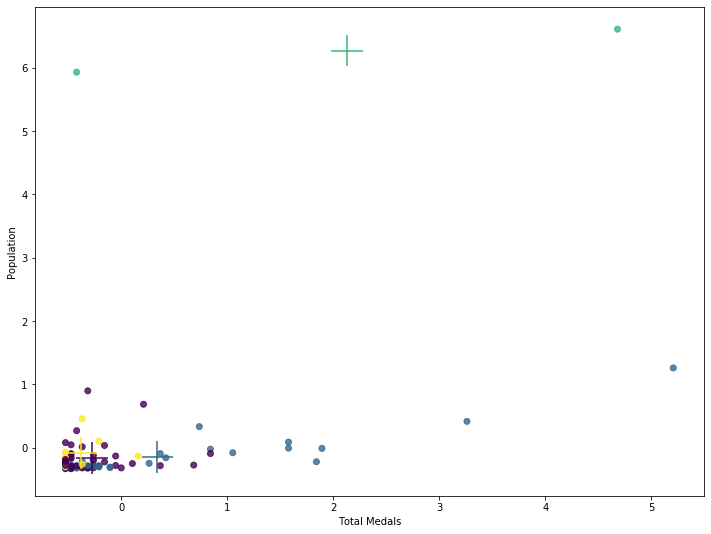

In [52]:
# 每两个维度去看
# visualize the result
plt.subplots(figsize = (12,9))
plt.scatter(scaled_plot['Total'], scaled_plot['Population'], c = label, alpha = 0.8)
plt.scatter(center[:,0],center[:,1],c=[0,1,2,3],marker='+',s=1000)
plt.xlabel('Total Medals')
plt.ylabel('Population')
plt.show()
# 中国和印度单列出来

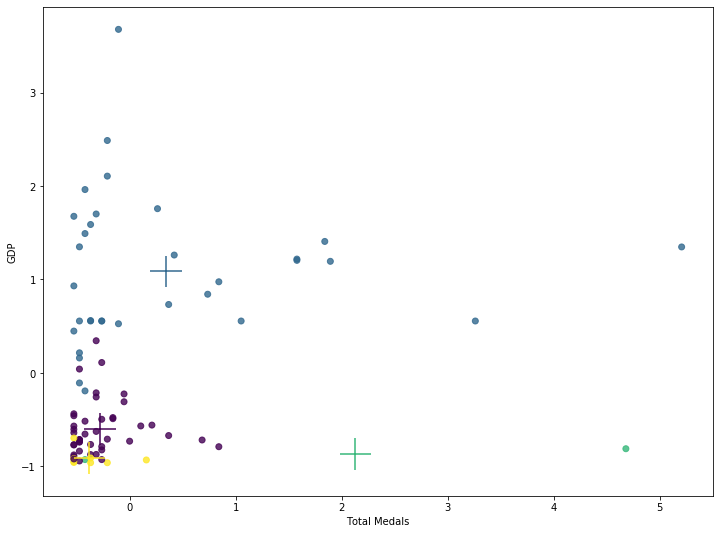

In [53]:
plt.subplots(figsize = (12,9))
plt.scatter(scaled_plot['Total'], scaled_plot['GDP'], c = label, alpha = 0.8)
plt.scatter(center[:,0],center[:,2],c=[0,1,2,3],marker='+',s=1000)
plt.xlabel('Total Medals')
plt.ylabel('GDP')
plt.show() #区分发展中和发达国家

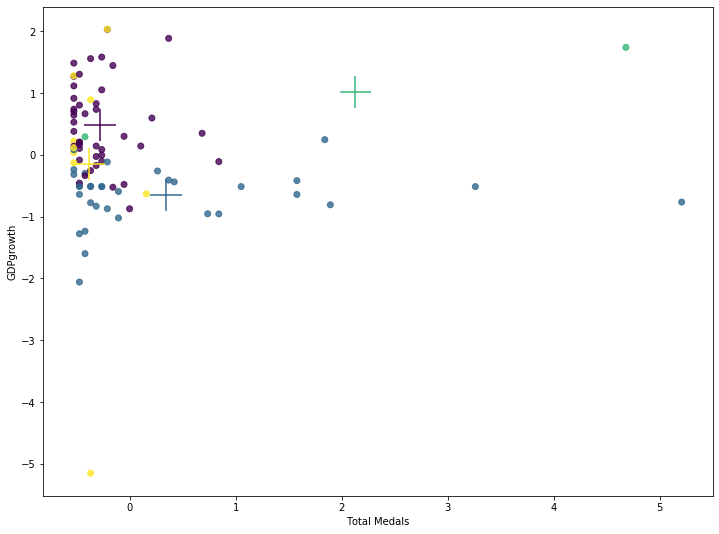

In [54]:
plt.subplots(figsize = (12,9))
plt.scatter(scaled_plot['Total'], scaled_plot['GDPgrowth'], c = label, alpha = 0.8)
plt.scatter(center[:,0],center[:,3],c=[0,1,2,3],marker='+',s=1000)
plt.xlabel('Total Medals')
plt.ylabel('GDPgrowth')
plt.show()
#发展中+发达国家 和 中国印度区分 --> 尝试k=4， 细分data[data['Cluster'] == 1]['Country'] 发展中国家（夹杂发达国家）

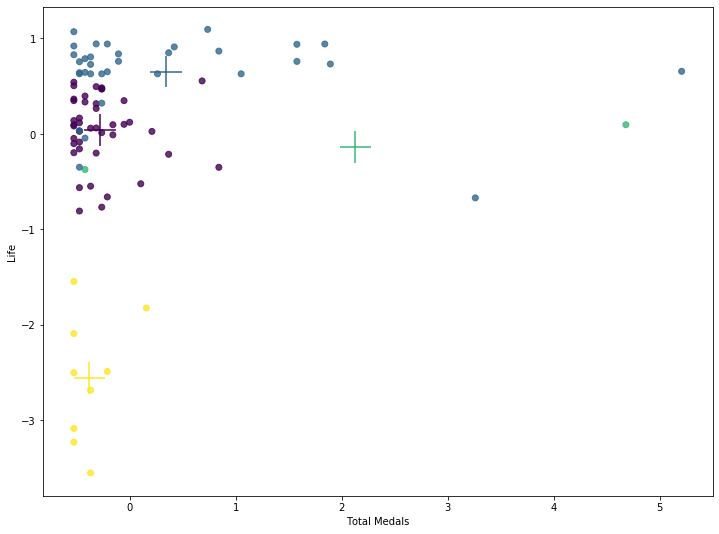

In [55]:
plt.subplots(figsize = (12,9))
plt.scatter(scaled_plot['Total'], scaled_plot['Life'], c = label, alpha = 0.8)
plt.scatter(center[:,0],center[:,4],c=[0,1,2,3],marker='+',s=1000)
plt.xlabel('Total Medals')
plt.ylabel('Life')
plt.show()